### K-Means Clustering Demonstration 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
data = pd.read_csv("C:/Users/cw/Downloads/Mall_Customers.xls")

In [4]:
data.shape

(200, 5)

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
plt.figure(figsize=(10, 5))
gender_mapping = {'Male': 0, 'Female': 1}

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

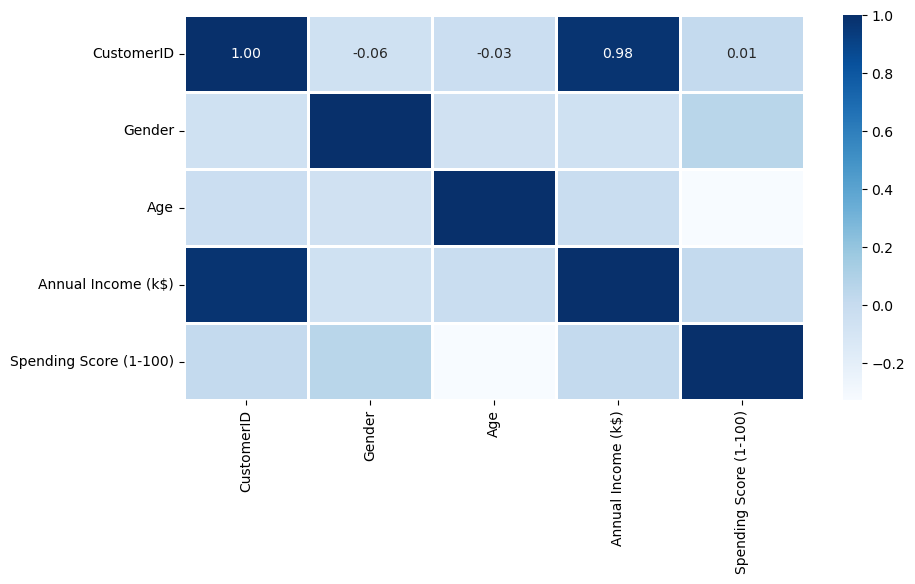

In [7]:
plt.figure(figsize=(10, 5))

gender_mapping = {'Male': 0, 'Female': 1}

data['Gender'] = data['Gender'].map(gender_mapping)

plt.figure(figsize=(10,5))
corr_target= data.drop("Spending Score (1-100)", axis=1)
sns.heatmap(data.corr(),annot=True,cmap='Blues',fmt='.2f',linewidths=2)
plt.show()

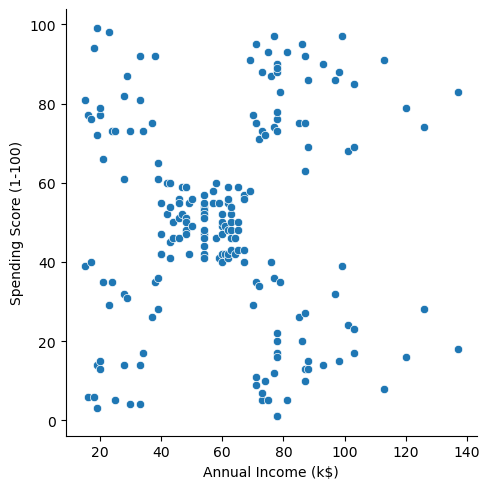

In [8]:
sns.relplot( x="Annual Income (k$)", y="Spending Score (1-100)", data=data)

In [9]:
# no. of clusters , suitable for particular data

In [10]:
X=data.drop(['Age','CustomerID','Gender'],axis=1)
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [14]:
warnings.filterwarnings("ignore", message="X does not have valid feature names")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

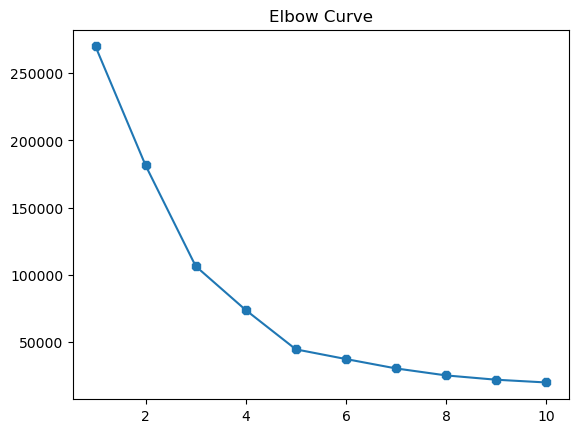

In [15]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,n_init=10) 
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) 
plt.plot(range(1,11),wcss,marker="8")
plt.title('Elbow Curve')
plt.show()

In [18]:
kmeans=KMeans(n_clusters=5,n_init=10)
label=kmeans.fit_predict(X)
print(label)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 0 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


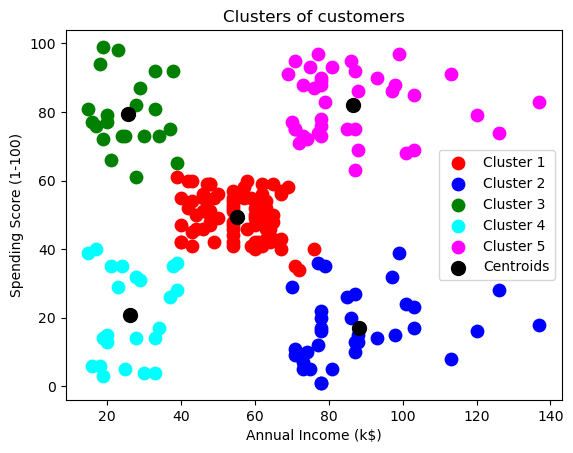

In [19]:
import matplotlib.pyplot as plt

plt.scatter(X.loc[label == 0, 'Annual Income (k$)'], X.loc[label == 0,
                   'Spending Score (1-100)'],
            s=80, c='red', label='Cluster 1')

plt.scatter(X.loc[label == 1, 'Annual Income (k$)'], X.loc[label == 1, 'Spending Score (1-100)'], s=80, c='blue', label='Cluster 2')
plt.scatter(X.loc[label == 2, 'Annual Income (k$)'], X.loc[label == 2, 'Spending Score (1-100)'], s=80, c='green', label='Cluster 3')
plt.scatter(X.loc[label == 3, 'Annual Income (k$)'], X.loc[label == 3, 'Spending Score (1-100)'], s=80, c='cyan', label='Cluster 4')
plt.scatter(X.loc[label == 4, 'Annual Income (k$)'], X.loc[label == 4, 'Spending Score (1-100)'], s=80, c='magenta', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100,
            c='black', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
